<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/UCI_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from google.colab import files

In [120]:
!pip install MissForest

In [121]:
from missforest import MissForest

In [122]:
files.upload()
df = pd.read_csv('UCI_Credit_Card.csv')
models_accs = {}
models_cms = {}
models_auc = {}
models_scores = {}
df.head()

Saving UCI_Credit_Card.csv to UCI_Credit_Card (2).csv


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [123]:
df.rename({'default.payment.next.month' : 'DEFAULT'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [124]:
df.drop("ID", axis="columns", inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [125]:
df.dtypes

,0
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64
PAY_5,int64


In [126]:
for name in ['SEX', 'EDUCATION', 'MARRIAGE', ]:
  print(df[name].unique())

#https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)

# Assuming 0 for Education&Marriage is missing data

[2 1]
[2 1 3 5 4 6 0]
[1 2 3 0]


In [127]:
df_new = df.loc[(df['MARRIAGE']!=0) & (df['EDUCATION']!=0)]

In [128]:
df.shape, df_new.shape

((30000, 24), (29932, 24))

In [129]:
df_default = df_new[df_new['DEFAULT']==1]
df_no_default = df_new[df_new['DEFAULT']==0]

In [130]:
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=52)
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=52)

In [131]:
df_downsampled = pd.concat([df_no_default_downsampled, df_default_downsampled])

In [132]:
X = df_downsampled.drop('DEFAULT', axis='columns').copy()
y = df_downsampled['DEFAULT'].copy()

In [133]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8229,500000.0,1,1,1,42,0,0,0,0,0,...,597415.0,569034.0,551702.0,568638.0,25624.0,21898.0,20851.0,19599.0,26000.0,20000.0
25271,80000.0,2,2,2,25,0,0,0,0,0,...,77657.0,70105.0,39751.0,14765.0,75004.0,3096.0,1887.0,1081.0,2044.0,0.0
17770,50000.0,2,2,2,53,0,0,0,0,0,...,50095.0,34120.0,33235.0,32377.0,1952.0,1979.0,1495.0,1144.0,1165.0,946.0
29327,90000.0,1,1,2,27,0,0,0,0,0,...,15783.0,16815.0,17236.0,17807.0,1600.0,2000.0,1600.0,1000.0,1000.0,1000.0
28651,160000.0,2,2,1,36,-1,-1,-1,-1,-1,...,805.0,666.0,740.0,539.0,206.0,886.0,679.0,740.0,539.0,0.0


In [134]:
y.head()

,DEFAULT
8229,0
25271,0
17770,0
29327,0
28651,0


In [135]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
8229,500000.0,42,580928.0,597793.0,597415.0,569034.0,551702.0,568638.0,25624.0,21898.0,...,False,False,False,True,False,False,False,False,False,False
25271,80000.0,25,80115.0,77427.0,77657.0,70105.0,39751.0,14765.0,75004.0,3096.0,...,False,False,False,True,False,False,False,False,False,False
17770,50000.0,53,51320.0,50602.0,50095.0,34120.0,33235.0,32377.0,1952.0,1979.0,...,False,False,False,True,False,False,False,False,False,False
29327,90000.0,27,21506.0,18304.0,15783.0,16815.0,17236.0,17807.0,1600.0,2000.0,...,False,False,False,True,False,False,False,False,False,False
28651,160000.0,36,2447.0,206.0,805.0,666.0,740.0,539.0,206.0,886.0,...,False,False,True,False,False,False,False,False,False,False


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=52)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

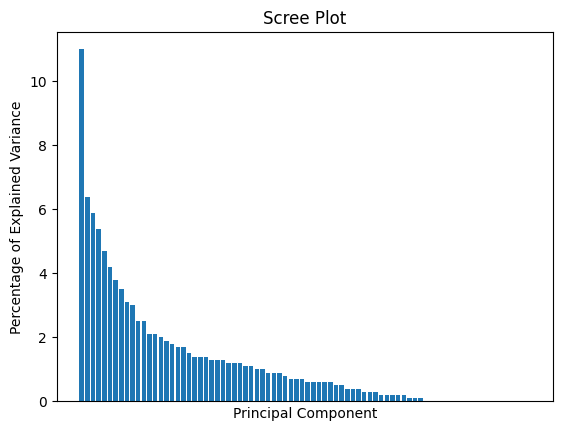

In [137]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.tick_params(
    axis="x",
    which="both",
    bottom=False,
    top=False,
    labelbottom=False
)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

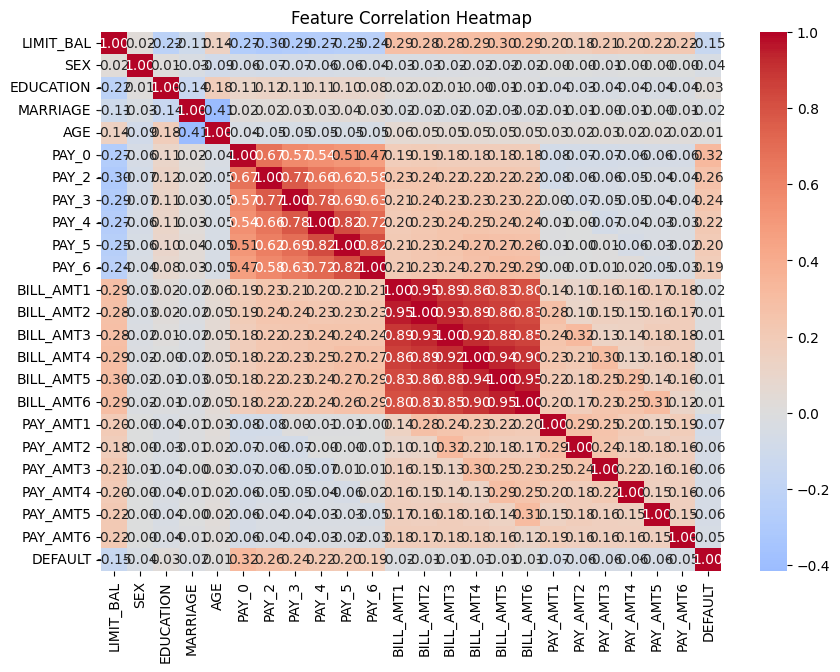

In [138]:
corr = df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [139]:
accs_var = []
accs = []

n_components = [0.8, 0.85, 0.9, 0.95, 0.99, 2, 5, 10, 15, 20, 23]

for n in n_components:
  pca = PCA(n)
  X_pca = pca.fit_transform(X_train_scaled)
  clf_svm = SVC(random_state=52, C=1, gamma="scale", kernel="rbf")
  clf_svm.fit(X_pca, y_train)
  acc = accuracy_score(y_test, clf_svm.predict(pca.transform(X_test_scaled)))
  if n <= 1:
    accs_var.append(acc)
  else:
    accs.append(acc)

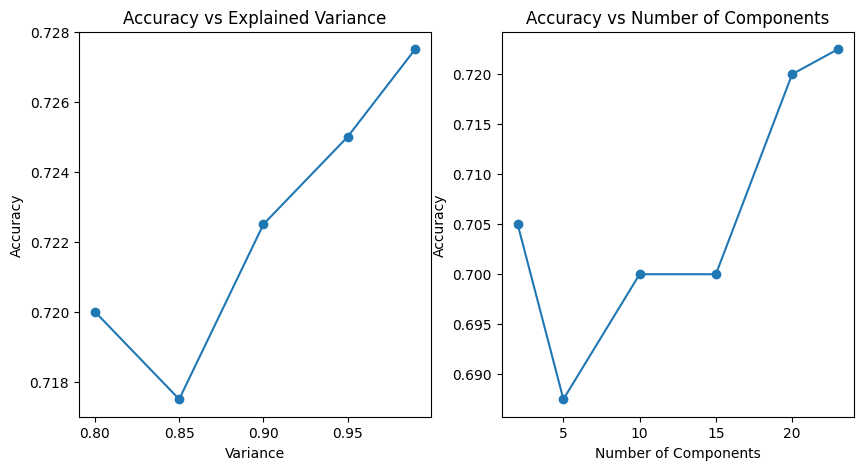

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(n_components[:len(accs_var)], accs_var, marker='o')
axes[0].set_xlabel("Variance")
axes[0].set_ylabel("Accuracy")

axes[1].plot(n_components[len(accs_var):], accs, marker='o')
axes[1].set_xlabel("Number of Components")
axes[1].set_ylabel("Accuracy")

axes[0].set_title("Accuracy vs Explained Variance")
axes[1].set_title("Accuracy vs Number of Components")

plt.show()

In [141]:
clf_svm = SVC(random_state=52)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=52)

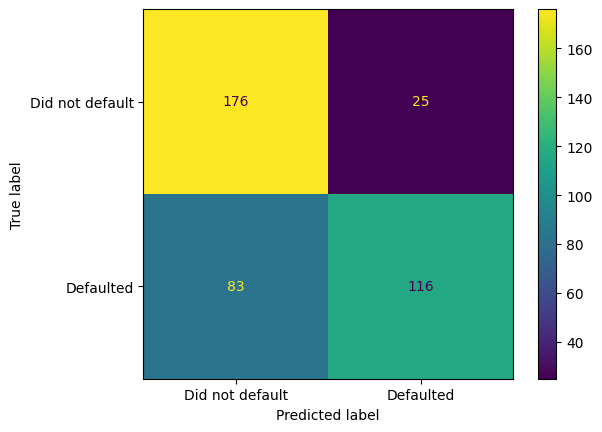

In [142]:
ConfusionMatrixDisplay(confusion_matrix(y_test, clf_svm.predict(X_test_scaled)), display_labels=["Did not default", "Defaulted"]).plot()

In [143]:
param_grid = [
    {"C" : [0.5, 1, 10, 100],
     "gamma" : ['scale', 1, 0.1, 0.001, 0.0001],
     "kernel" : ["rbf", "poly"]
     }
]

optimal_params = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
optimal_params.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
                          'kernel': ['rbf', 'poly']}],
             scoring='accuracy')

In [144]:
print(optimal_params.best_params_)

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


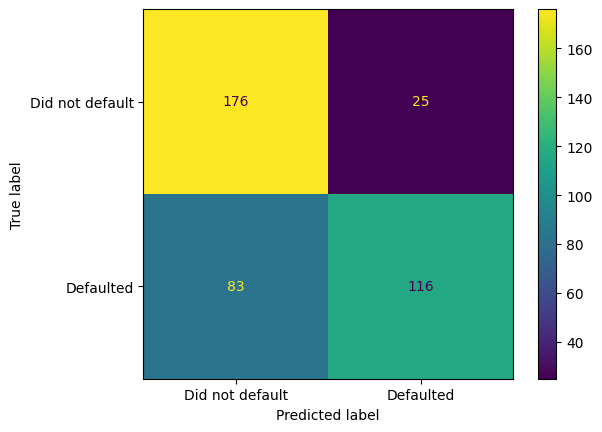

In [145]:
clf_svm = optimal_params.best_estimator_
clf_svm.fit(X_train_scaled, y_train)
y_pred = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
models_cms["Logistic Regression"]=(cm)
models_accs["Logistic Regression"]=(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm, display_labels=["Did not default", "Defaulted"]).plot()

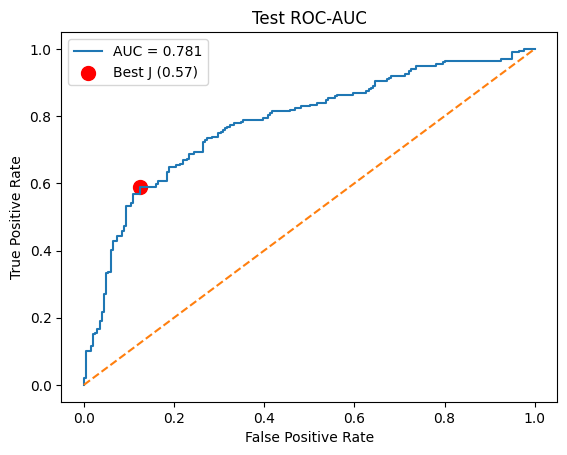

In [146]:
y_pred_proba = clf_svm.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_pred_proba)
train_auc = roc_auc_score(y_train, clf_svm.predict_proba(X_train_scaled)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

models_auc["Logistic Regression"] = {"fpr":fpr, "tpr":tpr, "thresholds":thresholds}

J = tpr - fpr
best_idx = np.argmax(J)
best_fpr = fpr[best_idx]
best_tpr = tpr[best_idx]
best_threshold = thresholds[best_idx]

plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.scatter(best_fpr, best_tpr, color='red', s=100, label=f"Best J ({best_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

In [147]:
cv_auc = cross_val_score(clf_svm, X_train_scaled, y_train, cv=5, scoring='roc_auc')
models_scores["Logistic Regression"] = {"CV AUC":cv_auc, "Test AUC":test_auc, "Train AUC":train_auc}
print(cv_auc)

[0.7196875  0.7828125  0.76125    0.77050781 0.8037814 ]


In [148]:
mask = fpr <= 0.1
best_idx = np.argmax(tpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Logistic Regression"]["AUC 0.1 FPR"] = best_threshold
mask = tpr >= 0.9
best_idx = np.argmin(fpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Logistic Regression"]["AUC 0.9 TPR"] = best_threshold

In [149]:
param_grid = [
  {
    "max_depth": [3, 5, 7, 10, 20, 23],
    "min_samples_leaf": [1, 5, 10, 20, 50],
  }
]

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=52),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)
print(grid.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


In [150]:
tree = grid.best_estimator_
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=52)

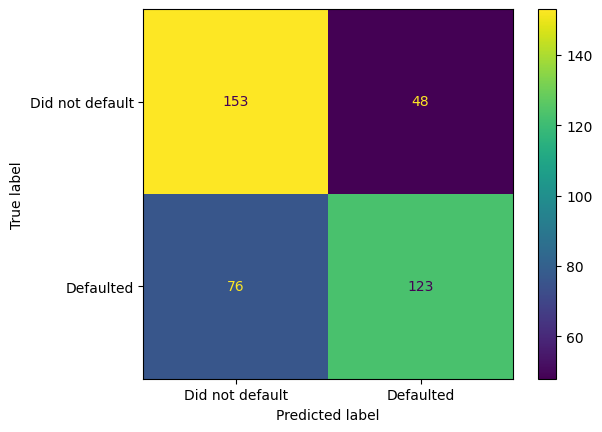

In [151]:
y_pred = tree.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
models_cms["Decision Tree"]=(cm)
models_accs["Decision Tree"]=(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm, display_labels=["Did not default", "Defaulted"]).plot()

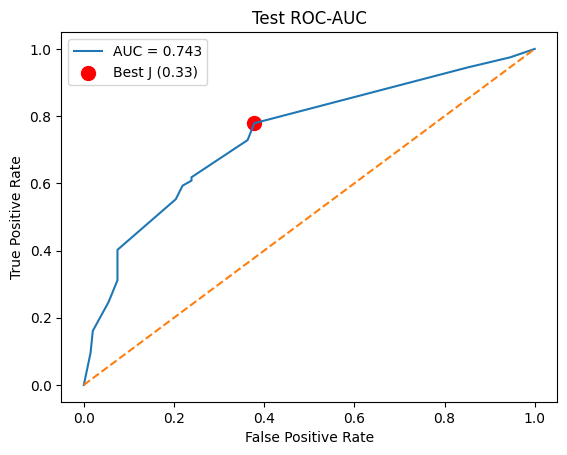

In [152]:
y_pred_proba = tree.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_pred_proba)
train_auc = roc_auc_score(y_train, tree.predict_proba(X_train_scaled)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

models_auc["Decision Tree"] = {"fpr":fpr, "tpr":tpr, "thresholds":thresholds}

J = tpr - fpr
best_idx = np.argmax(J)
best_fpr = fpr[best_idx]
best_tpr = tpr[best_idx]
best_threshold = thresholds[best_idx]

plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.scatter(best_fpr, best_tpr, color='red', s=100, label=f"Best J ({best_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

In [153]:
cv_auc = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='roc_auc')
models_scores["Decision Tree"] = {"CV AUC":cv_auc, "Test AUC":test_auc, "Train AUC":train_auc}
print(cv_auc)

[0.72826172 0.75308594 0.76220703 0.77144531 0.78440564]


In [154]:
mask = fpr <= 0.1
best_idx = np.argmax(tpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Decision Tree"]["AUC 0.1 FPR"] = best_threshold
mask = tpr >= 0.9
best_idx = np.argmin(fpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Decision Tree"]["AUC 0.9 TPR"] = best_threshold

In [155]:
models_scores

{'Logistic Regression': {'CV AUC': array([0.7196875 , 0.7828125 , 0.76125   , 0.77050781, 0.8037814 ]),
  'Test AUC': np.float64(0.7809945248631216),
  'Train AUC': np.float64(0.8525794571554017),
  'AUC 0.1 FPR': np.float64(0.6782332293104708),
  'AUC 0.9 TPR': np.float64(0.2947700377307611)},
 'Decision Tree': {'CV AUC': array([0.72826172, 0.75308594, 0.76220703, 0.77144531, 0.78440564]),
  'Test AUC': np.float64(0.7433310832770819),
  'Train AUC': np.float64(0.7959332748957421),
  'AUC 0.1 FPR': np.float64(0.8313253012048193),
  'AUC 0.9 TPR': np.float64(0.27405857740585776)}}

ПЕРЕПИСАТЬ

Если банк хочет контролировать FPR (не допустить кредит дефолтщику) -> Decision Tree лучше, потому что при FPR <= 0.1 она ловит больше дефолтщиков (TPR выше в этом диапазоне)

Если банк хочет общую производительность без жёстких ограничений -> Logistic Regression выигрывает

In [156]:
df_default = df[df['DEFAULT']==1]
df_no_default = df[df['DEFAULT']==0]
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=52)
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=52)
df_downsampled = pd.concat([df_no_default_downsampled, df_default_downsampled])

cols_with_zero_as_missing = ['MARRIAGE', 'EDUCATION']
df_downsampled[cols_with_zero_as_missing] = df_downsampled[cols_with_zero_as_missing].replace(0, np.nan)

categorical = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

imputer = MissForest(
    clf=RandomForestClassifier(n_jobs=-1), # все ядра CPU
    rgr=RandomForestRegressor(n_jobs=-1), # все ядра CPU
    categorical=categorical
)
df_no_missing = imputer.fit_transform(df_downsampled)
df_no_missing.shape

/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
100%|██████████| 5/5 [03:59<00:00, 47.92s/it]
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.12/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process 

(2000, 24)

In [157]:
for name in ['EDUCATION', 'MARRIAGE']:
  print(df_no_missing[name].unique())

[2. 1. 3. 5. 4. 6.]
[1. 2. 3.]


In [158]:
df_no_missing.dtypes

,0
LIMIT_BAL,float64
SEX,int64
PAY_0,int64
AGE,int64
PAY_2,int64
PAY_3,int64
PAY_5,int64
PAY_4,int64
BILL_AMT2,float64
BILL_AMT3,float64


In [159]:
df_no_missing["EDUCATION"] = df_no_missing["EDUCATION"].astype(int)
df_no_missing["MARRIAGE"] = df_no_missing["MARRIAGE"].astype(int)
df_no_missing.dtypes

,0
LIMIT_BAL,float64
SEX,int64
PAY_0,int64
AGE,int64
PAY_2,int64
PAY_3,int64
PAY_5,int64
PAY_4,int64
BILL_AMT2,float64
BILL_AMT3,float64


In [160]:
X = df_no_missing.drop('DEFAULT', axis='columns').copy()
y = df_no_missing['DEFAULT'].copy()
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=52)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [161]:
X_train.shape

(1600, 82)

In [162]:
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 7, None],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5, 10],
    "max_features": ['sqrt', 'log2', 0.5]
}

rf = RandomForestClassifier(random_state=52)

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best params: {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.7025


In [163]:
forest = grid.best_estimator_
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, max_features=0.5, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=200, random_state=52)

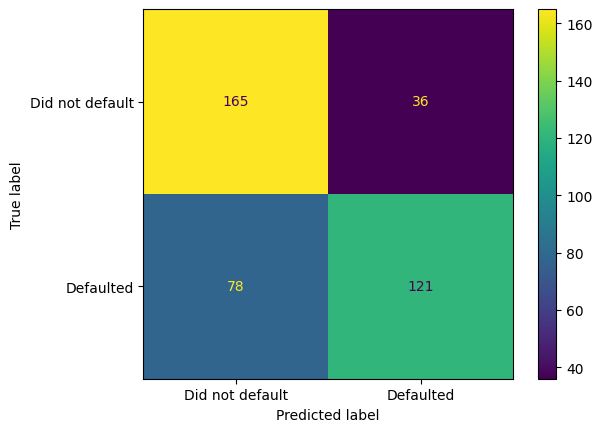

In [164]:
y_pred = forest.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
models_cms["Random Forest"]=(cm)
models_accs["Random Forest"]=(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm, display_labels=["Did not default", "Defaulted"]).plot()

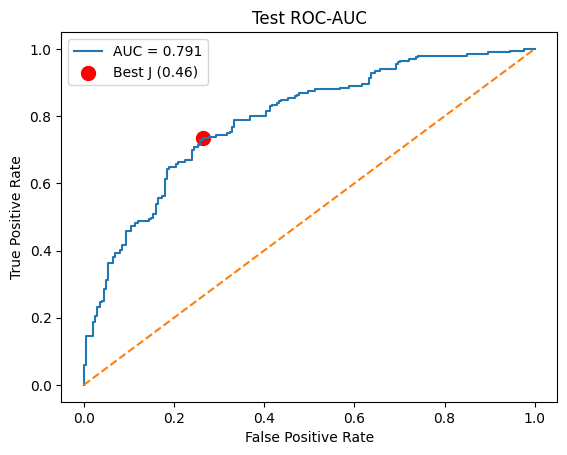

In [165]:
y_pred_proba = forest.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_pred_proba)
train_auc = roc_auc_score(y_train, forest.predict_proba(X_train_scaled)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

models_auc["Random Forest"] = {"fpr":fpr, "tpr":tpr, "thresholds":thresholds}

J = tpr - fpr
best_idx = np.argmax(J)
best_fpr = fpr[best_idx]
best_tpr = tpr[best_idx]
best_threshold = thresholds[best_idx]

plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.scatter(best_fpr, best_tpr, color='red', s=100, label=f"Best J ({best_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

In [166]:
cv_auc = cross_val_score(forest, X_train_scaled, y_train, cv=5, scoring='roc_auc')
models_scores["Random Forest"] = {"CV AUC":cv_auc, "Test AUC":test_auc, "Train AUC":train_auc}
print(cv_auc)

[0.75964844 0.79300781 0.7790625  0.78378906 0.70674636]


In [167]:
mask = fpr <= 0.1
best_idx = np.argmax(tpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Random Forest"]["AUC 0.1 FPR"] = best_threshold
mask = tpr >= 0.9
best_idx = np.argmin(fpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["Random Forest"]["AUC 0.9 TPR"] = best_threshold

In [168]:
from xgboost import XGBClassifier

In [169]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [170]:
param_grid = {
    "n_estimators": [100, 200, 500, 1000],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1]
}

grid = GridSearchCV(
    estimator=XGBClassifier(random_state=52),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print(f"Best params: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best score: 0.6975


In [171]:
best_xgb = grid.best_estimator_
best_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [172]:
df_results = pd.DataFrame(grid.cv_results_)
df_results.sort_values(by="rank_test_score", inplace=True)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
32,0.153506,0.014838,0.005040,0.000463,0.10,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.706250,0.709375,0.696875,0.718750,0.656250,0.697500,0.021777,1
3,1.375308,0.251016,0.012837,0.002496,0.01,3,1000,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.684375,0.715625,0.693750,0.715625,0.656250,0.693125,0.022132,2
16,0.197365,0.015421,0.007757,0.003679,0.05,3,100,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.696875,0.706250,0.706250,0.700000,0.653125,0.692500,0.020020,3
17,0.481804,0.054842,0.008354,0.001935,0.05,3,200,"{'learning_rate': 0.05, 'max_depth': 3, 'n_est...",0.690625,0.712500,0.690625,0.718750,0.650000,0.692500,0.024093,4
5,0.703038,0.025589,0.006812,0.000167,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.684375,0.709375,0.706250,0.681250,0.668750,0.690000,0.015487,5
6,1.418177,0.031657,0.010674,0.000172,0.01,5,500,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.675000,0.725000,0.709375,0.690625,0.646875,0.689375,0.027143,6
1,0.300548,0.010663,0.005277,0.000094,0.01,3,200,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.659375,0.706250,0.725000,0.706250,0.650000,0.689375,0.029288,6
0,0.164638,0.005181,0.005211,0.000911,0.01,3,100,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.640625,0.715625,0.715625,0.712500,0.662500,0.689375,0.031660,6
2,1.028130,0.198856,0.013886,0.003553,0.01,3,500,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.690625,0.703125,0.703125,0.696875,0.650000,0.688750,0.019922,9
10,3.025640,0.450645,0.018828,0.005294,0.01,7,500,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.665625,0.731250,0.693750,0.690625,0.653125,0.686875,0.026911,10


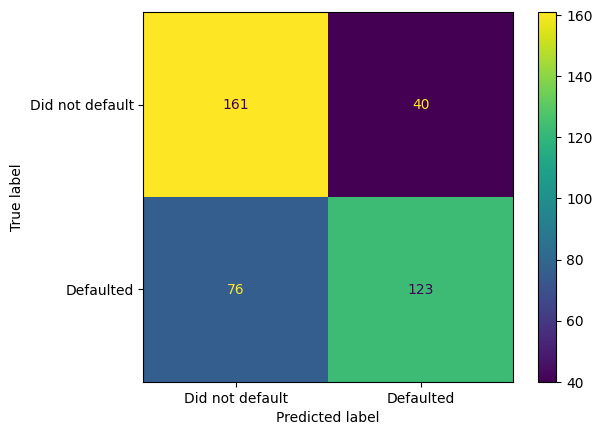

In [173]:
y_pred = best_xgb.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
models_cms["XGB"]=(cm)
models_accs["XGB"]=(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(cm, display_labels=["Did not default", "Defaulted"]).plot()

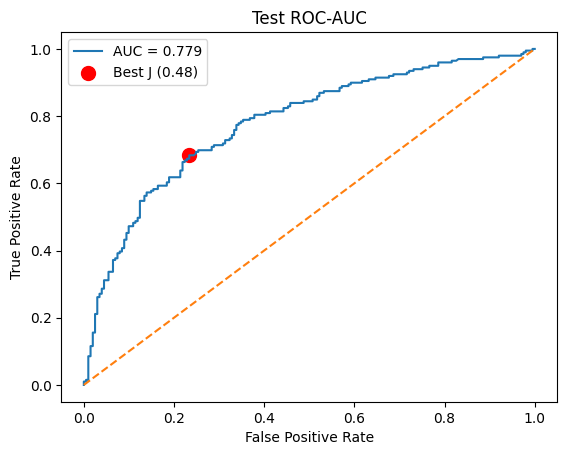

In [174]:
y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:,1]
test_auc = roc_auc_score(y_test, y_pred_proba)
train_auc = roc_auc_score(y_train, best_xgb.predict_proba(X_train_scaled)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

models_auc["XGB"] = {"fpr":fpr, "tpr":tpr, "thresholds":thresholds}

J = tpr - fpr
best_idx = np.argmax(J)
best_fpr = fpr[best_idx]
best_tpr = tpr[best_idx]
best_threshold = thresholds[best_idx]

plt.plot(fpr, tpr, label=f"AUC = {test_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.scatter(best_fpr, best_tpr, color='red', s=100, label=f"Best J ({best_threshold:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

In [175]:
cv_auc = cross_val_score(best_xgb, X_train_scaled, y_train, cv=5, scoring='roc_auc')
models_scores["XGB"] = {"CV AUC":cv_auc, "Test AUC":test_auc, "Train AUC":train_auc}
print(cv_auc)

[0.75691406 0.79792969 0.76441406 0.77716797 0.71512559]


In [176]:
mask = fpr <= 0.1
best_idx = np.argmax(tpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["XGB"]["AUC 0.1 FPR"] = best_threshold
mask = tpr >= 0.9
best_idx = np.argmin(fpr[mask])
best_threshold = thresholds[mask][best_idx]
models_scores["XGB"]["AUC 0.9 TPR"] = best_threshold

In [177]:
names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGB"]

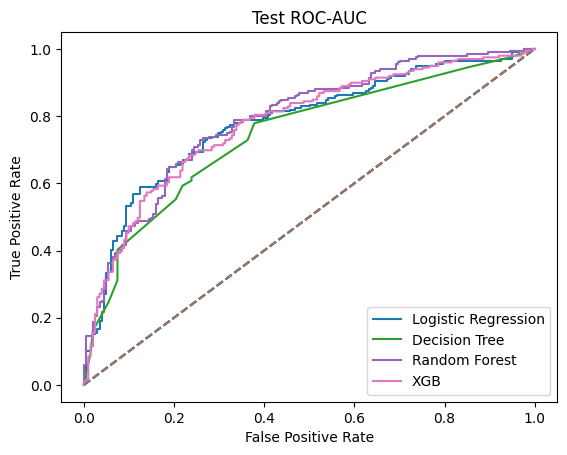

In [178]:
for name in names:
  plt.plot(models_auc[name]["fpr"], models_auc[name]["tpr"], label=name)
  plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("Test ROC-AUC")
plt.show()

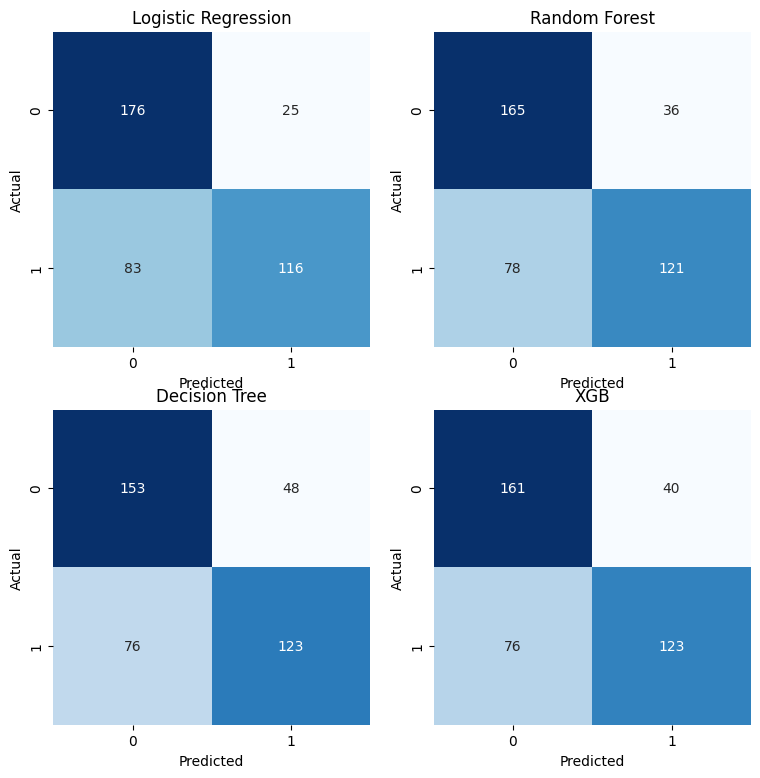

In [179]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

for i in range (2):
  for j in range(2):
    idx = i + j * 2

    sns.heatmap(
      models_cms[names[idx]],
      annot=True,
      fmt="d",
      cmap="Blues",
      cbar=False,
      ax=axes[i, j]
    )

    axes[i, j].set_title(names[idx])
    axes[i, j].set_xlabel("Predicted")
    axes[i, j].set_ylabel("Actual")

plt.show()

In [180]:
models_scores

{'Logistic Regression': {'CV AUC': array([0.7196875 , 0.7828125 , 0.76125   , 0.77050781, 0.8037814 ]),
  'Test AUC': np.float64(0.7809945248631216),
  'Train AUC': np.float64(0.8525794571554017),
  'AUC 0.1 FPR': np.float64(0.6782332293104708),
  'AUC 0.9 TPR': np.float64(0.2947700377307611)},
 'Decision Tree': {'CV AUC': array([0.72826172, 0.75308594, 0.76220703, 0.77144531, 0.78440564]),
  'Test AUC': np.float64(0.7433310832770819),
  'Train AUC': np.float64(0.7959332748957421),
  'AUC 0.1 FPR': np.float64(0.8313253012048193),
  'AUC 0.9 TPR': np.float64(0.27405857740585776)},
 'Random Forest': {'CV AUC': array([0.75964844, 0.79300781, 0.7790625 , 0.78378906, 0.70674636]),
  'Test AUC': np.float64(0.7906197654941373),
  'Train AUC': np.float64(0.835810680954189),
  'AUC 0.1 FPR': np.float64(0.6275792035561661),
  'AUC 0.9 TPR': np.float64(0.32167592614662976)},
 'XGB': {'CV AUC': array([0.75691406, 0.79792969, 0.76441406, 0.77716797, 0.71512559]),
  'Test AUC': np.float64(0.77909447

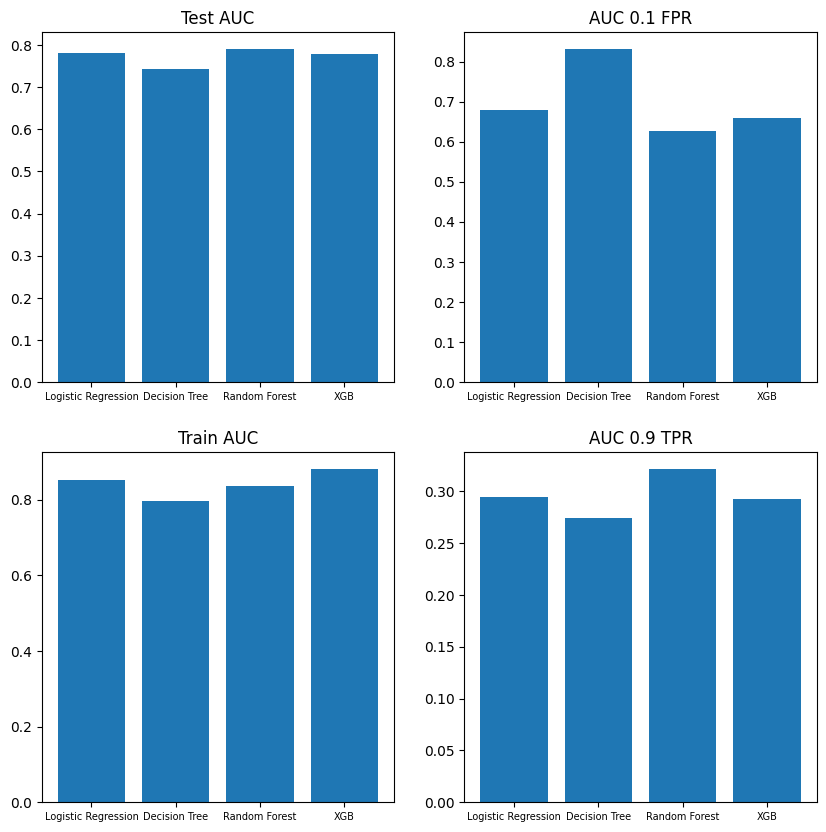

In [181]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

idx_to_metric = {
    1: "Test AUC",
    2: "Train AUC",
    3: "AUC 0.1 FPR",
    4: "AUC 0.9 TPR"
}

for i in range(2):
  for j in range(2):
    idx = i + 2 * j

    metric = idx_to_metric[idx+1]

    values = np.array([
        model_dict[metric]
        for model_dict in models_scores.values()
    ])

    axes[i, j].bar(names, values)
    axes[i, j].set_title(idx_to_metric[idx+1])

for ax in axes.flat:
    ax.tick_params(axis='x', labelsize=7)

plt.show()

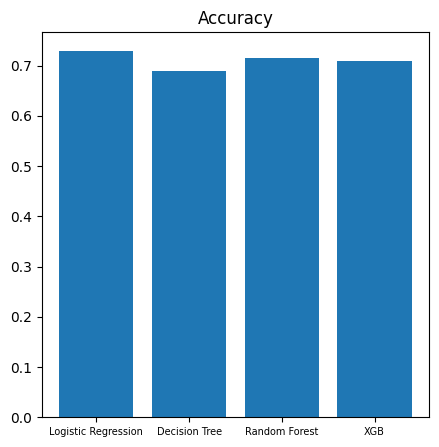

In [182]:
plt.figure(figsize=(5, 5))
plt.bar(names, models_accs.values())
plt.title("Accuracy")
plt.tick_params(axis="x", labelsize=7)
plt.show()